In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/DATASET-balanced.csv
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/trump-to-Obama.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/margot-to-musk.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/linus-to-obama.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/taylor-to-trump.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/taylor-to-biden.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/ryan-to-trump.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/obama-to-musk.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/musk-to-trump.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/ryan-to-musk.wav
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/trump-to-musk.wav
/kaggle/input/deep-voice-deepfake-

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [3]:
def load_and_preprocess_data(audio_path, label):
    audio, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    return mfccs.T, label

def prepare_dataset(real_paths, fake_paths):
    X, y = [], []
    
    for path in real_paths:
        features, label = load_and_preprocess_data(path, 0)
        X.append(features)
        y.append(label)
    
    for path in fake_paths:
        features, label = load_and_preprocess_data(path, 1)
        X.append(features)
        y.append(label)
    
    return X, np.array(y)

In [4]:
def augment_data(X, y):
    augmented_X, augmented_y = [], []
    
    for features, label in zip(X, y):
        augmented_X.append(features)
        augmented_y.append(label)
        
        # Time stretching (done on the audio signal before MFCC extraction)
        audio_signal = librosa.effects.time_stretch(features.T[0], rate=0.8)  # Simulate on audio signal
        augmented_X.append(librosa.feature.mfcc(y=audio_signal, sr=22050, n_mfcc=13).T)
        augmented_y.append(label)
        
        # Pitch shifting
        audio_signal_shifted = librosa.effects.pitch_shift(features.T[0], sr=22050, n_steps=2)
        augmented_X.append(librosa.feature.mfcc(y=audio_signal_shifted, sr=22050, n_mfcc=13).T)
        augmented_y.append(label)
    
    return augmented_X, np.array(augmented_y)


In [5]:
def create_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Masking(mask_value=0.),
        LSTM(64, return_sequences=True),
        Dropout(0.2),
        LSTM(32),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(2, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [6]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs=50, batch_size=32):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_split=0.2, verbose=1)
    
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test accuracy: {test_acc:.4f}")
    
    return history

In [7]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [8]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [9]:
import os

In [10]:
base_path = "/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO"

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
from tensorflow.keras.layers import Input, Masking


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.7685 - loss: 0.5896 - val_accuracy: 0.8710 - val_loss: 0.4836
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.8822 - loss: 0.4487 - val_accuracy: 0.8710 - val_loss: 0.4025
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.8801 - loss: 0.3950 - val_accuracy: 0.8710 - val_loss: 0.3812
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.8916 - loss: 0.3426 - val_accuracy: 0.8710 - val_loss: 0.3844
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.8833 - loss: 0.3488 - val_accuracy: 0.8710 - val_loss: 0.3750
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.8666 - loss: 0.3751 - val_accuracy: 0.8710 - val_loss: 0.3730
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.9062 - loss: 0.2867 - val_accuracy: 0.8710 - val_loss: 0.3625
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.8937 - loss: 0.3076 - val_accuracy: 0.8710 - val_loss: 0.3567
Epoch 9/

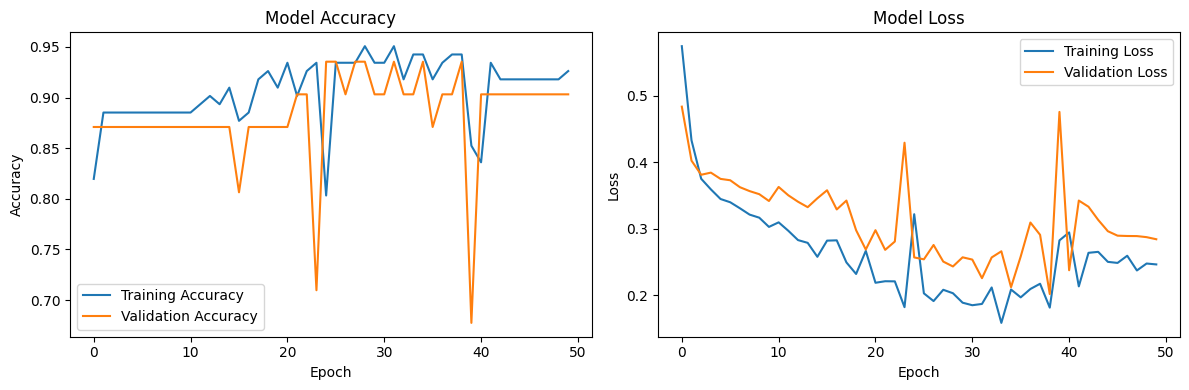

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step


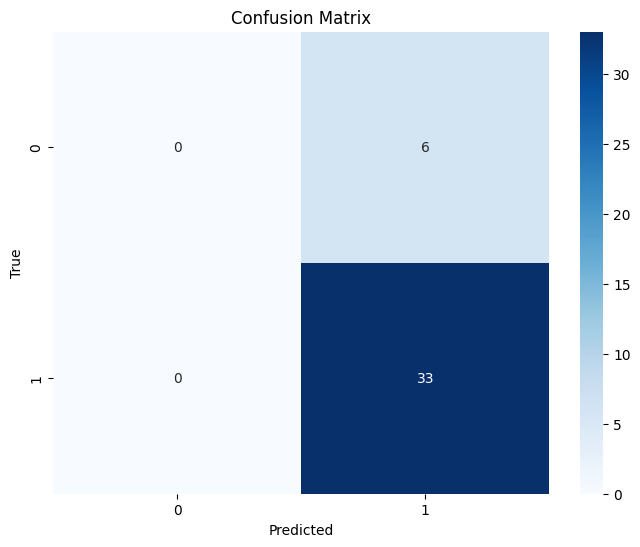

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        33

    accuracy                           0.85        39
   macro avg       0.42      0.50      0.46        39
weighted avg       0.72      0.85      0.78        39

Number of real audio samples: 8
Number of fake audio samples: 56
Total number of samples: 64
Shape of padded dataset: (192, 56293, 13)
Maximum sequence length: 56293
Shape of X_train: (153, 56293, 13)
Shape of X_test: (39, 56293, 13)


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
real_paths = [os.path.join(base_path, "REAL", f) for f in os.listdir(os.path.join(base_path, "REAL")) if f.endswith('.wav')]
fake_paths = [os.path.join(base_path, "FAKE", f) for f in os.listdir(os.path.join(base_path, "FAKE")) if f.endswith('.wav')]

# Prepare and augment the dataset
X, y = prepare_dataset(real_paths, fake_paths)
X_augmented, y_augmented = augment_data(X, y)

# Pad sequences
max_length = max(len(seq) for seq in X_augmented)
X_padded = pad_sequences(X_augmented, maxlen=max_length, dtype='float32', padding='post', truncating='post')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_augmented, test_size=0.2, random_state=42)

# Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create and train the model
model = create_model(input_shape=(X_train.shape[1], X_train.shape[2]))
history = train_and_evaluate(model, X_train, y_train, X_test, y_test)

# Visualize the results
plot_training_history(history)

y_pred = model.predict(X_test)
plot_confusion_matrix(y_test, y_pred)

print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

# Optional: Print dataset statistics
print(f"Number of real audio samples: {len(real_paths)}")
print(f"Number of fake audio samples: {len(fake_paths)}")
print(f"Total number of samples: {len(real_paths) + len(fake_paths)}")
print(f"Shape of padded dataset: {X_padded.shape}")
print(f"Maximum sequence length: {max_length}")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

In [14]:
import librosa
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

def preprocess_audio(audio_path, max_length):
    # Load the audio
    audio, sr = librosa.load(audio_path, sr=None)
    
    # Extract MFCC features (use same parameters as training)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    
    # Transpose the MFCCs to match the input format
    mfccs = mfccs.T
    
    # Pad the sequence to the max length used during training
    padded_mfccs = pad_sequences([mfccs], maxlen=max_length, dtype='float32', padding='post', truncating='post')
    
    return padded_mfccs



In [15]:
test_audio_paths = ['/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/trump-to-taylor.wav', '/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/REAL/biden-original.wav']  # List of audio file paths

for audio_path in test_audio_paths:
    padded_sample = preprocess_audio(audio_path, max_length=X_train.shape[1])
    prediction = model.predict(padded_sample)
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    if predicted_class == 1:
        print(f"{audio_path}: Fake")
    else:
        print(f"{audio_path}: Real")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/FAKE/trump-to-taylor.wav: Fake
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
/kaggle/input/deep-voice-deepfake-voice-recognition/KAGGLE/AUDIO/REAL/biden-original.wav: Real
